## Bluring and Smoothing

In [1]:
# Importing the library
import cv2
import numpy as np
import matplotlib.pyplot as plt
image_path = 'E:\\My_Docs\\OpenCV_Teaching\\images\\'

### Blur

In [3]:
# importing libraries
import cv2
import numpy as np

img = cv2.imread(image_path + 'face3.jpg')

cv2.imshow('Original Image', img)

# Blur
blur = cv2.blur(img, (7, 7))
cv2.imshow('Blurring', blur)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Gaussian Blur

In [4]:
# importing libraries
import cv2
import numpy as np

img = cv2.imread(image_path + 'face3.jpg')

cv2.imshow('Original Image', img)

# Gaussian Blur
Gaussian = cv2.GaussianBlur(img, (9, 9), 0)
cv2.imshow('Gaussian Blurring', Gaussian)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Median Blur

In [7]:
# importing libraries
import cv2
import numpy as np

img = cv2.imread(image_path + 'face3.jpg')

cv2.imshow('Original Image', img)

# Median Blur
median = cv2.medianBlur(img, 9)
cv2.imshow('Median Blurring', median)

cv2.waitKey(0)
cv2.destroyAllWindows()


### Bilateral Blur

In [12]:
# importing libraries
import cv2
import numpy as np

img = cv2.imread(image_path + 'face3.jpg')

cv2.imshow('Original Image', img)

# Bilateral Blur
bilateral = cv2.bilateralFilter(img, 31, 45, 250)    # (img, 31, 45, 250)
cv2.imshow('Bilateral Blurring', bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()


### مقایسه فیلترها

In [8]:
# importing libraries
import cv2
import numpy as np

img = cv2.imread(image_path + 'face3.jpg')

cv2.imshow('Original Image', img)

# Gaussian Blur
Gaussian = cv2.GaussianBlur(img, (9, 9), 0)
cv2.imshow('Gaussian Blurring', Gaussian)

# Median Blur
median = cv2.medianBlur(img, 9)
cv2.imshow('Median Blurring', median)

# Bilateral Blur
bilateral = cv2.bilateralFilter(img, 31, 45, 250)
cv2.imshow('Bilateral Blurring', bilateral)

cv2.waitKey(0)
cv2.destroyAllWindows()

### دو فیلتر غیر خطی دیگر

#### فرض کنیم بجای میانه در فیلتر میدین از حداکثر و یا حداقل مقادیر جهت جایگزینی مقادیر محاسبه شده پس از کرنل استفاده شود

#### Erosion ----> Min

#### در این تابع نقاط تیره به دلیل داشتن مقادیر کمتر بیشتر می شوند و پیکسل های روشن کمتر دیده می شوند.

#### Dilation -----> Max

#### در این تابع برعکس حالت قبل مقادیر پیکسل های روشن بیشتر حفظ می شوند و لذا پیکسل های روشن بیشتر و پیکسل های تیره کمتر دیده می شوند

#### نکته مهم : یکی از پرکاربردترین روش های استخراج داده های مهم  که همان پیکسل ها هستند در شبکه های عصبی این روش می باشد که با عنوان زیر از آن استفاده می شود

### Maxpooling

### Erosion

In [9]:
# importing libraries
import cv2
import numpy as np

img = cv2.imread(image_path + 'cat.jpg')

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.

img_erosion = cv2.erode(img, kernel, iterations=1)

cv2.imshow('Original Image', img)
cv2.imshow('Image Erosion', img_erosion)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Dilation

In [6]:
# importing libraries
import cv2
import numpy as np

img = cv2.imread(image_path + 'cat.jpg')

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.

img_dilation = cv2.dilate(img, kernel, iterations=1)

cv2.imshow('Original Image', img)
cv2.imshow('Image Dilation', img_dilation)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Have some FUN??? ............. Cartonizing The images

#### Pyramid down -------->  
#### New number of cols = Original Number of cols / 2
#### New number of rows = Original Number of rows / 2


#### ----------------------------
#### Pyramid UP  ------------->
#### New number of cols = Original Number of cols * 2
#### New number of rows = Original Number of rows * 2

<img src='../images/pyramid.png' width = 400>

<img src= '../images/pyramid_Messi.jpg'>

<img src='../images/pyramid_matrix.png' width = 600>

In [3]:
# Compare the original image with smaller and larger (same size of original) by Pyramid

img = cv2.imread('../images/cat.jpg')

smaller = cv2.pyrDown(img)
larger = cv2.pyrUp(smaller)

cv2.imshow('Original', img )
cv2.imshow('Smaller ', smaller )
cv2.imshow('Larger ', larger )

cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
def cartoonize(rgb_image, *, num_pyr_downs=1, num_bilaterals=7):
    # STEP 1 -- Apply a bilateral filter to reduce the color palette of
    # the image.
    downsampled_img = rgb_image
    for _ in range(num_pyr_downs):
        downsampled_img = cv2.pyrDown(downsampled_img)

    for _ in range(num_bilaterals):
        filterd_small_img = cv2.bilateralFilter(downsampled_img, 9, 9, 7)

    filtered_normal_img = filterd_small_img
    for _ in range(num_pyr_downs):
        filtered_normal_img = cv2.pyrUp(filtered_normal_img)

    # make sure resulting image has the same dims as original
    if filtered_normal_img.shape != rgb_image.shape:
        filtered_normal_img = cv2.resize(filtered_normal_img, rgb_image.shape[:2])

    # STEP 2 -- Convert the original color image into grayscale.
    img_gray = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    # STEP 3 -- Apply a median blur to reduce image noise.
    img_blur = cv2.medianBlur(img_gray, 7)

    # STEP 4 -- Use adaptive thresholding to detect and emphasize the edges
    # in an edge mask.
    gray_edges = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                       cv2.THRESH_BINARY, 9, 2)
    # STEP 5 -- Combine the color image from step 1 with the edge mask
    # from step 4.
    rgb_edges = cv2.cvtColor(gray_edges, cv2.COLOR_GRAY2RGB)
    
    return cv2.bitwise_and(filtered_normal_img, rgb_edges)

In [5]:
img_rgb = cv2.imread('../images/cat.jpg')

cartonize_img = cartoonize(img_rgb, num_pyr_downs=1)
cv2.imshow('cartonize_img', cartonize_img)
cv2.imshow('Original_img', img_rgb)

cv2.waitKey(0)
cv2.destroyAllWindows()

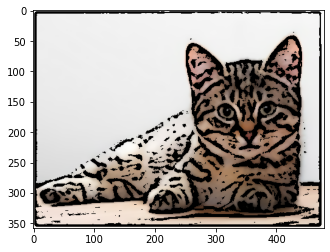

In [26]:
img = cv2.imread('../images/cat.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_carton = cartoonize(img)
plt.imshow(img_carton)

### استفاده از فیلتر های دلخواه و اعمال به تصویر

cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])


### Sharpenning

In [13]:
image = cv2.imread(image_path + 'leuvenB.jpg')
cv2.imshow('Original', image)

# Create our shapening kernel, we don't normalize since the 
# the values in the matrix sum to 1
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

cv2.imshow('Image Sharpening', sharpened)

cv2.waitKey(0)
cv2.destroyAllWindows()

### اعمال فیلترها روی ویدیو

In [21]:
# Bilateral filter on total video

# filename_video = '../images/charlie-chaplin.mp4'
vid = cv2.VideoCapture(0)   # filename_video

while True:
    ret, frame = vid.read()

    if ret:
        blurred = cv2.GaussianBlur(frame, (15, 15), 0)
        cv2.imshow('Blurred Filter', blurred)
        cv2.imshow('Original Video', frame)

        k = cv2.waitKey(1) & 0xFF
        if k == 27 :    
            break
    else:
        break

vid.release()
cv2.destroyAllWindows()

In [22]:
# Blur a small area of video

vid = cv2.VideoCapture(0)
_, first_frame = vid.read()

x, y, w, h = cv2.selectROI(first_frame, False)
cv2.destroyAllWindows()

point1 = (x, y)
point2 = (x+w, y+h)

while True:
    ret, frame = vid.read()

    if ret:
        cropped_frame = frame[point1[1]:point2[1], point1[0]:point2[0]]
        blur_frame = cv2.blur(cropped_frame, (31,31))
        
        partly_blur_frame = frame.copy()
        partly_blur_frame[point1[1]:point2[1], point1[0]:point2[0]] = blur_frame
        
        cv2.rectangle(frame, (point1[0], point1[1]), (point2[0], point2[1]), (0,0,255),1)
        cv2.imshow('partly_blur Filter', partly_blur_frame)
        cv2.imshow('Original Video', frame)

        k = cv2.waitKey(30) & 0xFF
        if k == 27 :    
            break
    else:
        break

vid.release()
cv2.destroyAllWindows()

In [27]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()

    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_carton = cartoonize(frame_rgb)
        # Show the video
        cv2.imshow('Video', frame_carton)
        cv2.imshow('Original Video', frame)
        k = cv2.waitKey(25) & 0xFF
        if k == 27:
            break
    else:
        break

vid.release()
cv2.destroyAllWindows()